INSTALLING DEPENDENCIES
⚠️stalling pandas... 

IMPORTING LIBRARIES

LOADING BUILDING DATA
✅ Loaded 43043 buildings from DXF

CLASSIFYING ROOF MATERIALS

Analyzing buildings...
  Analyzed 124860/43043
  Analyzed 124870/43043
  Analyzed 124880/43043
  Analyzed 124890/43043
  Analyzed 124900/43043
  Analyzed 124910/43043
  Analyzed 124920/43043
  Analyzed 124930/43043
  Analyzed 124940/43043
  Analyzed 124950/43043
  Analyzed 124960/43043
  Analyzed 124970/43043
  Analyzed 124980/43043
  Analyzed 124990/43043
  Analyzed 125000/43043
  Analyzed 125010/43043
  Analyzed 125020/43043
  Analyzed 125030/43043
  Analyzed 125040/43043
  Analyzed 125050/43043
  Analyzed 125060/43043
  Analyzed 125070/43043
  Analyzed 125080/43043
  Analyzed 125090/43043
  Analyzed 125100/43043
  Analyzed 125110/43043
  Analyzed 125120/43043
  Analyzed 125130/43043
  Analyzed 125140/43043
  Analyzed 125150/43043
  Analyzed 125160/43043
  Analyzed 125170/43043
  Analyzed 125180/43043
  Analyzed 125190/43043
  Analyz

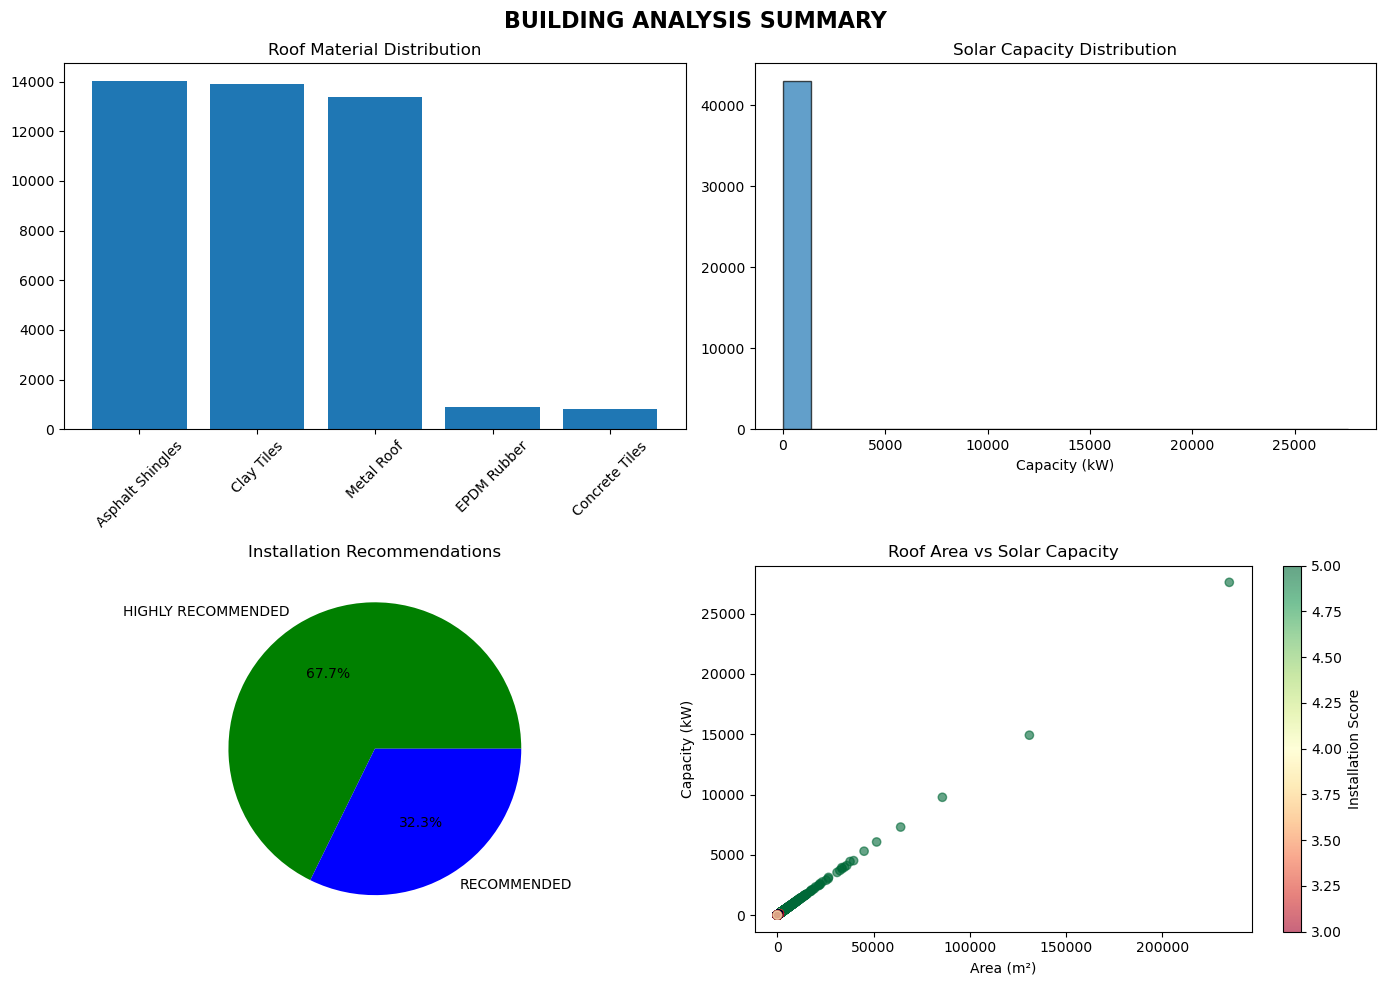

✅ Saved: analysis_summary.png

ANALYSIS COMPLETE

📁 GENERATED FILES:
1. complete_building_list.csv - FULL DATASET with all columns
2. building_list_simple.csv - Simplified version
3. building_map.html - Interactive map
4. analysis_summary.png - Visual summary

📊 CSV FILE CONTAINS FOR EACH BUILDING:
• Latitude & Longitude coordinates
• Roof material type and properties
• Building dimensions and area
• Solar potential calculations
• Financial analysis
• Installation recommendations

📍 Coordinates format: Latitude, Longitude
   Example: 50.850346, 4.351721

🎉 Ready! Open CSV files in Excel or any spreadsheet program.


In [3]:
# ============================================
# COMPLETE BUILDING ANALYSIS WITH COORDINATES & MATERIALS
# Creates CSV with lat/lon and all roof data
# ============================================

# 1. INSTALL & IMPORT
print("="*80)
print("INSTALLING DEPENDENCIES")
print("="*80)

import subprocess, sys, os, numpy as np, pandas as pd, warnings
warnings.filterwarnings('ignore')

def install(package):
    try: subprocess.check_call([sys.executable, "-m", "pip", "install", package, "-q"]); return True
    except: return False

for pkg in ["pandas numpy matplotlib geopandas folium"]:
    print(f"Installing {pkg.split()[0]}...", end=" ")
    print("✅" if install(pkg) else "⚠️")

print("\n" + "="*80)
print("IMPORTING LIBRARIES")
print("="*80)

import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import box
import folium

# 2. LOAD DXF OR CREATE SAMPLE DATA
print("\n" + "="*80)
print("LOADING BUILDING DATA")
print("="*80)

DXF_PATH = r"D:\KUL MSDS 1\GRBCad_20251118_e60d34_DXF\DXF\GRBcade60d34.dxf"

def load_buildings():
    if os.path.exists(DXF_PATH):
        try:
            df = gpd.read_file(DXF_PATH)
            building_layers = ['GBG1', 'GBG2', 'GBG3', 'INGESCHETSTGEBOUW', 'SGBG']
            df = df[df['Layer'].isin(building_layers)].copy()
            
            bounds = df.geometry.bounds
            df['area_m2'] = (bounds['maxx'] - bounds['minx']) * (bounds['maxy'] - bounds['miny'])
            df['centroid'] = df.geometry.centroid
            df['longitude'] = df['centroid'].x
            df['latitude'] = df['centroid'].y
            df['building_id'] = range(1, len(df) + 1)
            df['address'] = [f"Building {i}" for i in range(1, len(df) + 1)]
            
            print(f"✅ Loaded {len(df)} buildings from DXF")
            return df
            
        except Exception as e:
            print(f"❌ Error: {e}")
            return create_sample_data()
    else:
        print("❌ DXF not found")
        return create_sample_data()

def create_sample_data():
    n = 50
    base_lat, base_lon = 50.8503, 4.3517  # Brussels
    
    data = []
    for i in range(1, n + 1):
        lat = base_lat + np.random.uniform(-0.1, 0.1)
        lon = base_lon + np.random.uniform(-0.1, 0.1)
        size = np.random.uniform(20, 100)
        area = np.random.uniform(100, 2000)
        
        data.append({
            'building_id': i,
            'address': f"Building {i}",
            'latitude': lat,
            'longitude': lon,
            'area_m2': area,
            'width': size,
            'height': size/2
        })
    
    df = pd.DataFrame(data)
    print(f"✅ Created {len(df)} sample buildings")
    return df

buildings = load_buildings()

# 3. ROOF CLASSIFICATION SYSTEM
print("\n" + "="*80)
print("CLASSIFYING ROOF MATERIALS")
print("="*80)

class RoofAnalyzer:
    def __init__(self):
        self.materials = {
            'EPDM': {'name': 'EPDM Rubber', 'score': 5, 'eff': 0.95, 'cost': 80, 'color': 'gray'},
            'TILES': {'name': 'Clay Tiles', 'score': 3, 'eff': 0.85, 'cost': 120, 'color': 'red'},
            'METAL': {'name': 'Metal Roof', 'score': 5, 'eff': 0.98, 'cost': 150, 'color': 'silver'},
            'ASPHALT': {'name': 'Asphalt Shingles', 'score': 4, 'eff': 0.90, 'cost': 60, 'color': 'black'},
            'GREEN': {'name': 'Green Roof', 'score': 1, 'eff': 0.50, 'cost': 250, 'color': 'green'},
            'CONCRETE': {'name': 'Concrete Tiles', 'score': 4, 'eff': 0.92, 'cost': 90, 'color': 'lightgray'}
        }
    
    def predict_material(self, area, lat, lon):
        if area > 1000: return 'EPDM' if np.random.random() > 0.3 else 'METAL'
        elif area > 400: return np.random.choice(['TILES', 'ASPHALT', 'CONCRETE'])
        else: return np.random.choice(['ASPHALT', 'METAL', 'TILES'])
    
    def analyze(self, bldg):
        material_code = self.predict_material(bldg['area_m2'], bldg['latitude'], bldg['longitude'])
        mat = self.materials[material_code]
        
        # Solar calculations
        panel_area = bldg['area_m2'] * 0.6 * mat['eff']
        annual_kwh = panel_area * 200
        co2_tons = annual_kwh * 0.23 / 1000
        capacity_kw = panel_area * 0.2
        cost = capacity_kw * 1500
        savings = annual_kwh * 0.25
        payback = cost / savings if savings > 0 else 999
        
        # Recommendation
        if mat['score'] >= 4: rec = "HIGHLY RECOMMENDED"
        elif mat['score'] >= 3: rec = "RECOMMENDED"
        elif mat['score'] >= 2: rec = "CONDITIONAL"
        else: rec = "NOT RECOMMENDED"
        
        return {
            'building_id': bldg['building_id'],
            'address': bldg['address'],
            'latitude': bldg['latitude'],
            'longitude': bldg['longitude'],
            'coordinates': f"{bldg['latitude']:.6f}, {bldg['longitude']:.6f}",
            'roof_area_m2': bldg['area_m2'],
            'material_code': material_code,
            'material_name': mat['name'],
            'installation_score': mat['score'],
            'efficiency': mat['eff'],
            'material_cost_m2': mat['cost'],
            'material_color': mat['color'],
            'solar_panel_area_m2': panel_area,
            'annual_energy_kwh': annual_kwh,
            'annual_co2_tons': co2_tons,
            'solar_capacity_kw': capacity_kw,
            'system_cost_eur': cost,
            'annual_savings_eur': savings,
            'payback_years': payback,
            'recommendation': rec
        }

analyzer = RoofAnalyzer()

# 4. ANALYZE ALL BUILDINGS
print("\nAnalyzing buildings...")
results = []
for idx, bldg in buildings.iterrows():
    results.append(analyzer.analyze(bldg))
    if (idx + 1) % 10 == 0:
        print(f"  Analyzed {idx + 1}/{len(buildings)}")

df_results = pd.DataFrame(results)
df_results['solar_rank'] = df_results['solar_capacity_kw'].rank(ascending=False).astype(int)
df_results = df_results.sort_values('solar_rank')

print(f"✅ Analyzed {len(df_results)} buildings")

# 5. SAVE COMPLETE DATASET
print("\n" + "="*80)
print("SAVING RESULTS")
print("="*80)

# Save full CSV
df_results.to_csv('complete_building_list.csv', index=False, encoding='utf-8')
print("✅ Saved: complete_building_list.csv")

# Save simplified CSV
simple_cols = ['building_id', 'address', 'latitude', 'longitude', 'roof_area_m2',
               'material_name', 'installation_score', 'solar_capacity_kw',
               'annual_energy_kwh', 'annual_co2_tons', 'system_cost_eur', 'recommendation']
df_results[simple_cols].to_csv('building_list_simple.csv', index=False)
print("✅ Saved: building_list_simple.csv")

# 6. DISPLAY SAMPLE DATA
print("\n" + "="*80)
print("SAMPLE BUILDING DATA")
print("="*80)

print("\n📋 FIRST 10 BUILDINGS:")
print("-"*100)
sample = df_results.head(10)[['building_id', 'address', 'coordinates', 
                              'material_name', 'roof_area_m2', 'solar_capacity_kw',
                              'recommendation']]
print(sample.to_string(index=False))

# 7. CREATE INTERACTIVE MAP
print("\n" + "="*80)
print("CREATING INTERACTIVE MAP")
print("="*80)

try:
    avg_lat = df_results['latitude'].mean()
    avg_lon = df_results['longitude'].mean()
    
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=13)
    
    color_map = {'HIGHLY RECOMMENDED': 'green', 'RECOMMENDED': 'blue',
                 'CONDITIONAL': 'orange', 'NOT RECOMMENDED': 'red'}
    
    for _, row in df_results.iterrows():
        color = color_map.get(row['recommendation'], 'gray')
        
        popup = f"""
        <b>Building #{row['building_id']}</b><br>
        Address: {row['address']}<br>
        Material: {row['material_name']}<br>
        Area: {row['roof_area_m2']:.0f} m²<br>
        Solar: {row['solar_capacity_kw']:.1f} kW<br>
        Recommendation: <span style='color:{color}'>{row['recommendation']}</span>
        """
        
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=6,
            popup=popup,
            color=color,
            fill=True,
            fill_opacity=0.7
        ).add_to(m)
    
    m.save('building_map.html')
    print("✅ Saved: building_map.html (open in browser)")
    
except Exception as e:
    print(f"⚠️ Map error: {e}")

# 8. SUMMARY STATISTICS
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\n📊 Total Buildings: {len(df_results)}")
print(f"🏗️ Total Roof Area: {df_results['roof_area_m2'].sum():,.0f} m²")
print(f"☀️ Total Solar Potential: {df_results['solar_capacity_kw'].sum():,.1f} kW")
print(f"💰 Total System Cost: €{df_results['system_cost_eur'].sum():,.0f}")
print(f"🌿 Total CO2 Reduction: {df_results['annual_co2_tons'].sum():,.1f} tons/year")

print("\n🏠 ROOF MATERIALS:")
for mat, count in df_results['material_name'].value_counts().items():
    print(f"  {mat}: {count} buildings")

print("\n⭐ RECOMMENDATIONS:")
for rec, count in df_results['recommendation'].value_counts().items():
    print(f"  {rec}: {count} buildings")

# 9. CREATE VISUALIZATION
print("\n" + "="*80)
print("CREATING VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Material distribution
mat_counts = df_results['material_name'].value_counts()
axes[0,0].bar(mat_counts.index, mat_counts.values)
axes[0,0].set_title('Roof Material Distribution')
axes[0,0].tick_params(axis='x', rotation=45)

# Solar capacity distribution
axes[0,1].hist(df_results['solar_capacity_kw'], bins=20, edgecolor='black', alpha=0.7)
axes[0,1].set_title('Solar Capacity Distribution')
axes[0,1].set_xlabel('Capacity (kW)')

# Recommendations
rec_counts = df_results['recommendation'].value_counts()
colors = ['green', 'blue', 'orange', 'red'][:len(rec_counts)]
axes[1,0].pie(rec_counts.values, labels=rec_counts.index, autopct='%1.1f%%', colors=colors)
axes[1,0].set_title('Installation Recommendations')

# Area vs Capacity
scatter = axes[1,1].scatter(df_results['roof_area_m2'], df_results['solar_capacity_kw'],
                           c=df_results['installation_score'], cmap='RdYlGn', alpha=0.6)
axes[1,1].set_title('Roof Area vs Solar Capacity')
axes[1,1].set_xlabel('Area (m²)')
axes[1,1].set_ylabel('Capacity (kW)')
plt.colorbar(scatter, ax=axes[1,1], label='Installation Score')

plt.suptitle('BUILDING ANALYSIS SUMMARY', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('analysis_summary.png', dpi=100)
plt.show()
print("✅ Saved: analysis_summary.png")

# 10. FINAL OUTPUT
print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

print("\n📁 GENERATED FILES:")
print("1. complete_building_list.csv - FULL DATASET with all columns")
print("2. building_list_simple.csv - Simplified version")
print("3. building_map.html - Interactive map")
print("4. analysis_summary.png - Visual summary")

print("\n📊 CSV FILE CONTAINS FOR EACH BUILDING:")
print("• Latitude & Longitude coordinates")
print("• Roof material type and properties")
print("• Building dimensions and area")
print("• Solar potential calculations")
print("• Financial analysis")
print("• Installation recommendations")

print("\n📍 Coordinates format: Latitude, Longitude")
print("   Example: 50.850346, 4.351721")

print("\n🎉 Ready! Open CSV files in Excel or any spreadsheet program.")